In [1]:
# VALIDATION CURVES and LEARNING CURVES in SciKit-Learn.

In [3]:
# Use of polynomials of various degrees for the training and test sets in order to 
# analyse the selection of the learning model and the size of the data set.

In [5]:
# Use of a polynomial regression model to present the validation curve and learning curve 
# for different degrees of the polynomial in order to show the relationship and find a bias-variance tradeoff.

In [7]:
# 1. Validation Curve 

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [11]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [13]:
# Data generation
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # random data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y+= err * rng.randn(N)
    return X,y

X, y = make_data(40)   

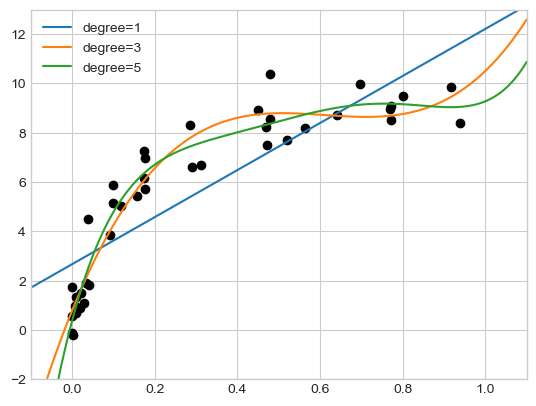

In [15]:
# Data visualisation for different polynomials with test data
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.1)
plt.ylim(-2, 13)
plt.legend(loc='best')

Text(0, 0.5, 'Accuracy')

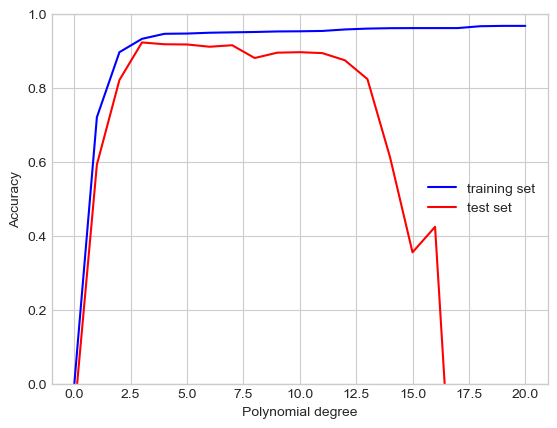

In [17]:
# Visualisation of the validation curve. Training set and Test set.

from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training set')
plt.plot(degree, np.median(val_score, 1),
         color='red', label='test set')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.xlabel('Polynomial degree')
plt.ylabel('Accuracy')

In [19]:
# CONCLUSION: Based on the validation curve, we can determine that the bias-variance tradeoff is achieved for a third-degree polynomial.

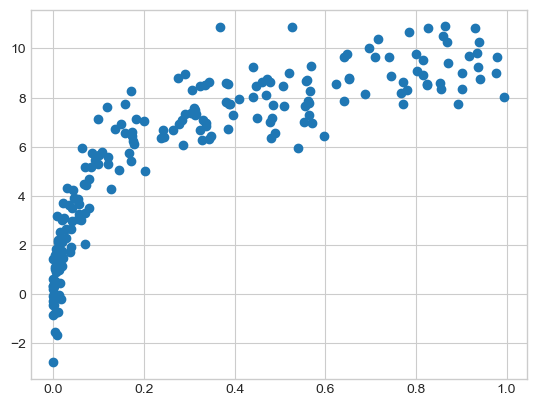

In [21]:
# The same data, but in greater quantity

X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

Text(0, 0.5, 'Accuracy')

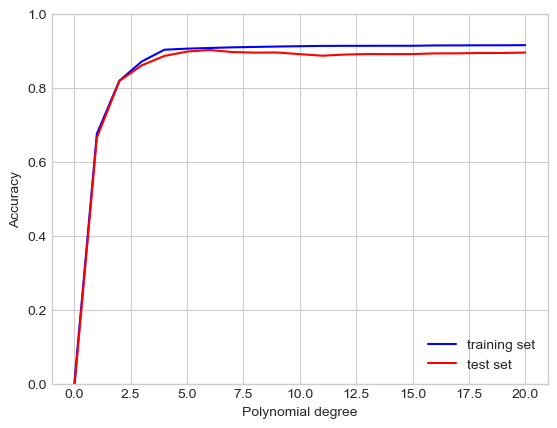

In [23]:
# Visualisation of the validation curve, but for bigger dataset. Training set and Test set.

degree = np.arange(0, 21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1),
         color='blue', label='training set')
plt.plot(degree, np.median(val_score2, 1),
         color='red', label='test set')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.xlabel('Polynomial degree')
plt.ylabel('Accuracy')

In [25]:
# This time, the maximum occurs around a 6th degree polynomial.
# CONCLUSION no.1: A larger data set allows for a much more complex model to be used.
# CONCLUSION no.2: The behaviour of the validation curve depends on the complexity of the model and the size of the elements in the training set.

In [27]:
# 2. Learning Curve

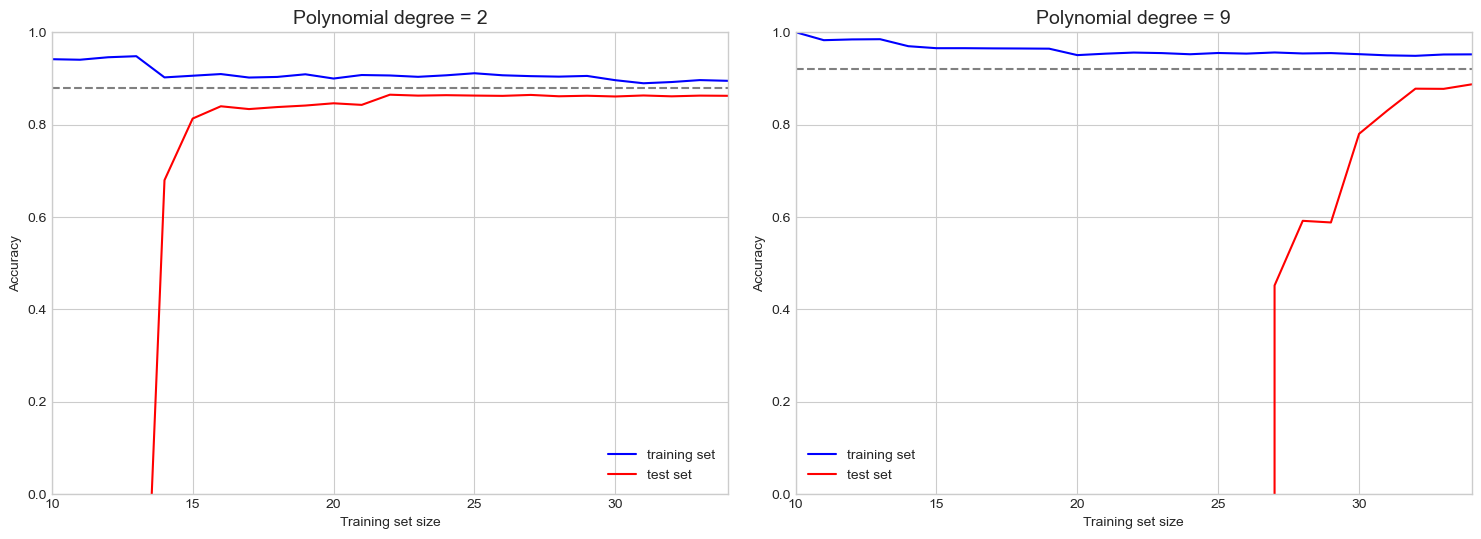

In [29]:
# Visualisation of the learning curve. Training set and Test set.

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right= 0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree), X, y, cv=7,
        train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1),
         color='blue', label='training set')
    ax[i].plot(N, np.mean(val_lc, 1),
         color='red', label='test set')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
                 N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].legend(loc='best')
    ax[i].set_xlabel('Training set size')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title('Polynomial degree = {0}'.format(degree), size=14)

In [31]:
# CONCLUSIONS:
# Learning curves are characterised by:
# 1. The model will be overfitted to a small data set – low accuracy in the test set, high accuracy in the training set.
# 2. The opposite situation will occur in the case of underfitting to a large data set – the result in the test set will increase, while in the training set it will decrease.
# 3. THE MODEL SHOULD NEVER HAVE A BETTER RESULT IN THE TEST SET THAN IN THE TRAINING SET. This means that the curves should converge, but never intersect.